In [1]:
!pip install ydata-profiling
!pip install gensim
!pip install Optuna
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 41.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bd5d5373c7b5d8a9234af6661424c3339cf2a760af468c8d05ed7e262a35d02f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.8 MB/s eta 0:00:00
  Created wheel for s

In [24]:
import os
import numpy as np
import pandas as pd

import ydata_profiling
from ydata_profiling import ProfileReport
from IPython.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import gensim.downloader as api
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.model_selection import train_test_split, StratifiedKFold
import optuna

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

!cp "/content/drive/MyDrive/Kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive
cp: cannot create regular file '/root/.kaggle/': Not a directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
def load_datasets():
    !kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset
    !unzip fake-and-real-news-dataset.zip -d fake-and-real-news-dataset
    df_real = pd.read_csv('/content/fake-and-real-news-dataset/True.csv')
    df_fake = pd.read_csv('/content/fake-and-real-news-dataset/Fake.csv')
    
    return df_real, df_fake

In [5]:
df_real, df_fake = load_datasets()

 95% 39.0M/41.0M [00:02<00:00, 32.3MB/s]
100% 41.0M/41.0M [00:02<00:00, 19.7MB/s]
Archive:  fake-and-real-news-dataset.zip
  inflating: fake-and-real-news-dataset/Fake.csv  
  inflating: fake-and-real-news-dataset/True.csv  


In [6]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [7]:
df_real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [8]:
df_real["label"] = 1
df_fake["label"] = 0
df = pd.concat([df_real, df_fake])

In [9]:
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [10]:
df_real.name = "df_real"
df_fake.name = "df_fake"
df.name = "df"

In [11]:
def basic_info(df):
  print(f"{df.name} info: \n")
  print(f"{df.info()} \n")
  print(f"{df.name} missing values: \n")
  print(f"{df.isna().sum().sort_values()} \n")
  print(f"Unique values in {df.name}: \n")
  print(f"{df.nunique()} \n")

In [12]:
basic_info(df_real)

df_real info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB
None 

df_real missing values: 

title      0
text       0
subject    0
date       0
label      0
dtype: int64 

Unique values in df_real: 

title      20826
text       21192
subject        2
date         716
label          1
dtype: int64 



In [13]:
basic_info(df_fake)

df_fake info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB
None 

df_fake missing values: 

title      0
text       0
subject    0
date       0
label      0
dtype: int64 

Unique values in df_fake: 

title      17903
text       17455
subject        6
date        1681
label          1
dtype: int64 



In [14]:
basic_info(df)

df info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB
None 

df missing values: 

title      0
text       0
subject    0
date       0
label      0
dtype: int64 

Unique values in df: 

title      38729
text       38646
subject        8
date        2397
label          2
dtype: int64 



# EDA

In [25]:
def perform_eda(df):
  html_name = df.name
  profile = ProfileReport(df, explorative=True)
  profile.to_file(f"Report_{html_name}_EDA.html")

In [26]:
perform_eda(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
def open_eda(df):
  html_name = df.name
  display(HTML(f"Report_{html_name}_EDA.html"))

In [28]:
open_eda(df)

Number of variables,5
Number of observations,44898
Missing cells,0
Missing cells (%),0.0%
Duplicate rows,196
Duplicate rows (%),0.4%
Total size in memory,178.8 MiB
Average record size in memory,4.1 KiB
Categorical,5
Dataset has 196 (0.4%) duplicate rows,Duplicates
title has a high cardinality: 38729 distinct values,High cardinality


In [29]:
def label_counts(df, column):
  label_counts = df[column].value_counts()
  print("\nLabel counts:\n", label_counts)
  label_counts = df[column].value_counts(normalize=True) * 100
  print(f"\nLabel counts (%):\n{label_counts}")

In [30]:
label_counts(df, "label")


Label counts:
 0    23481
1    21417
Name: label, dtype: int64

Label counts (%):
0    52.298543
1    47.701457
Name: label, dtype: float64


<Axes: >

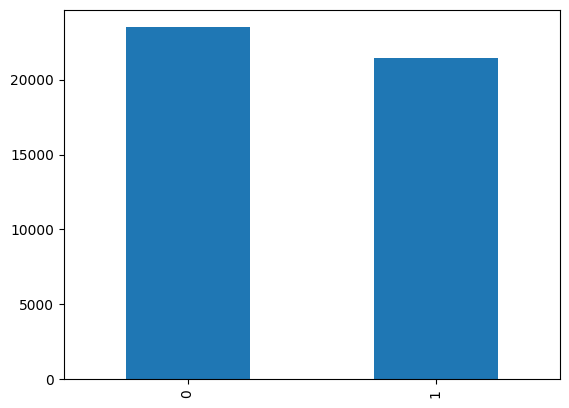

In [31]:
df['label'].value_counts().plot.bar()

<Axes: xlabel='index'>

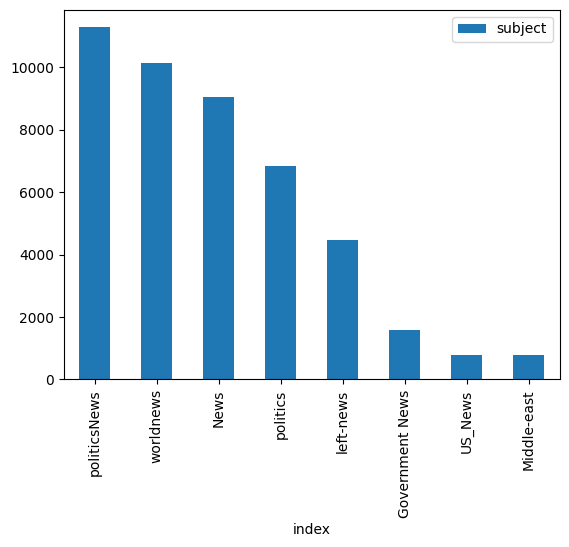

In [32]:
df_source = df['subject'].value_counts(ascending=False).reset_index()
df_source[:10].plot.bar(x='index')

In [33]:
grouped_data = df.groupby(['subject', 'label']).size().reset_index(name='count')

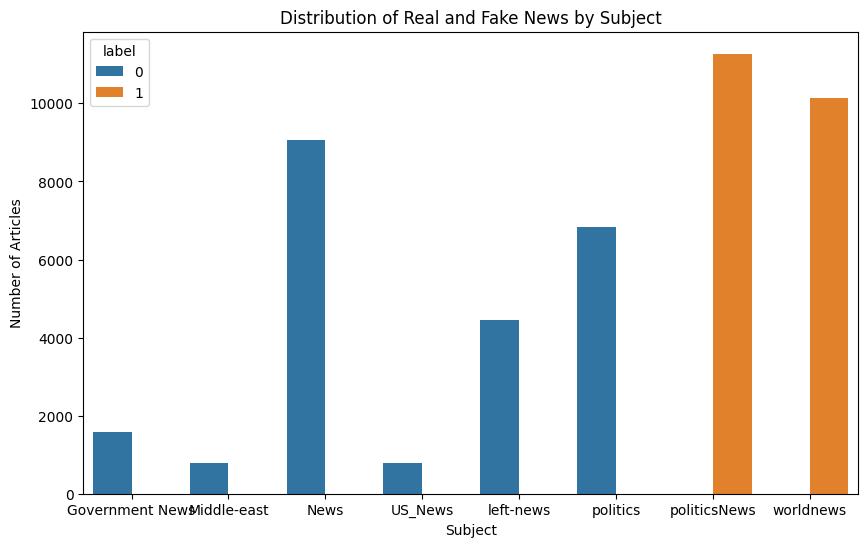

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='subject', y='count', hue='label', data=grouped_data)
plt.xlabel('Subject')
plt.ylabel('Number of Articles')
plt.title('Distribution of Real and Fake News by Subject')
plt.show()

In [35]:
def make_wordcloud(text):
    wordcloud = WordCloud(width=1000, height=1000).generate(text)
    plt.figure(figsize = (10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

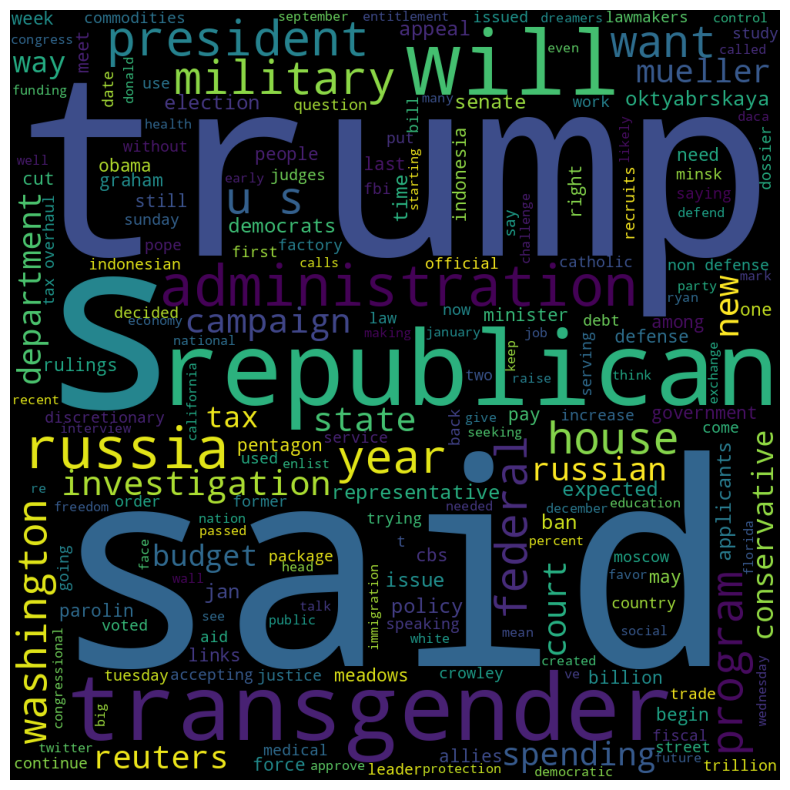

In [36]:
txt = str(df_real['text'].values).lower()
make_wordcloud(txt)

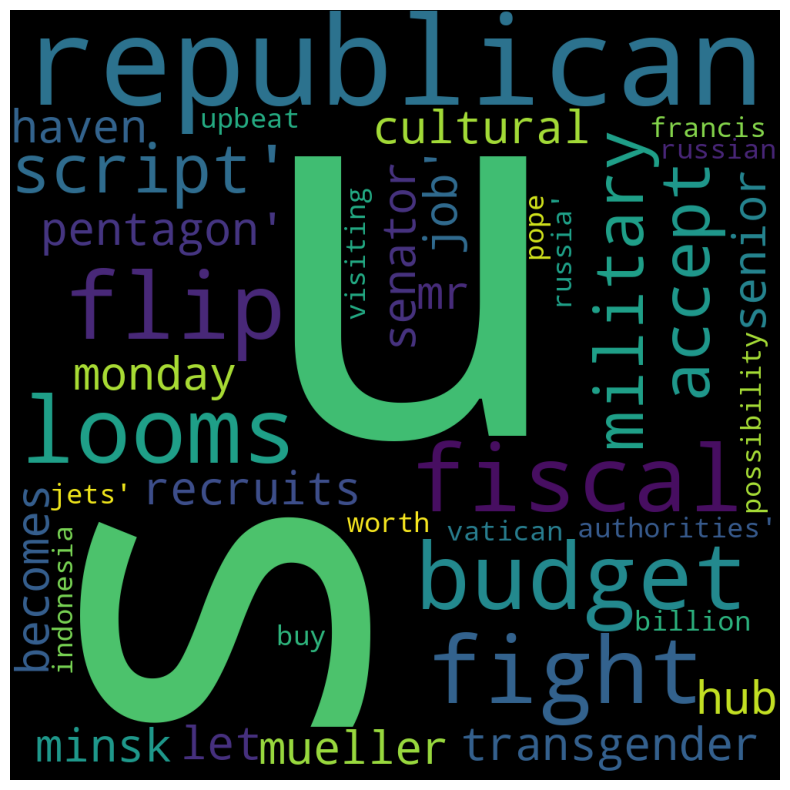

In [37]:
txt = str(df_real['title'].values).lower()
make_wordcloud(txt)

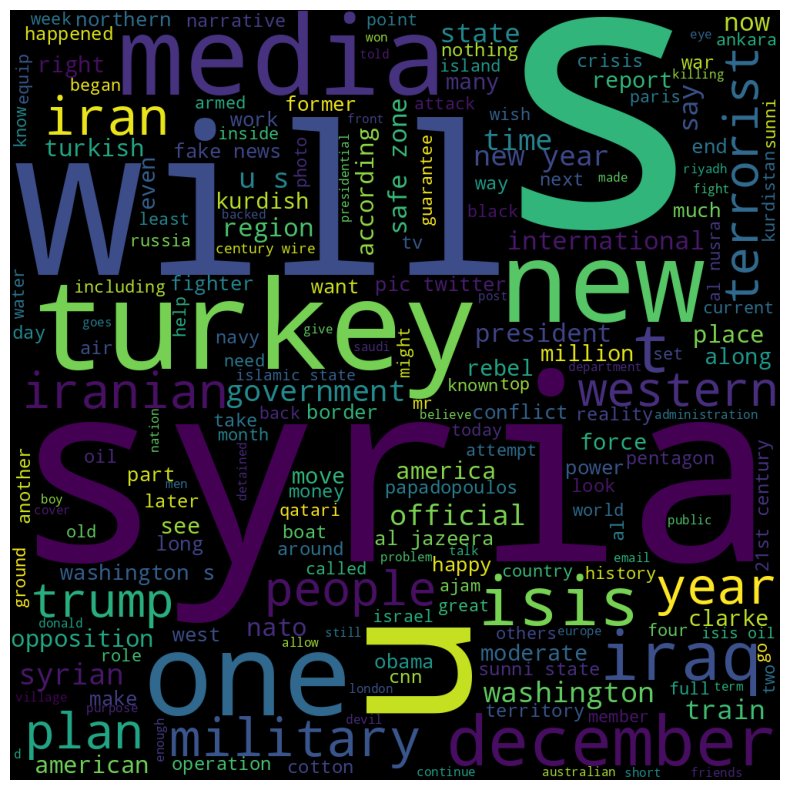

In [38]:
txt = str(df_fake['text'].values).lower()
make_wordcloud(txt)

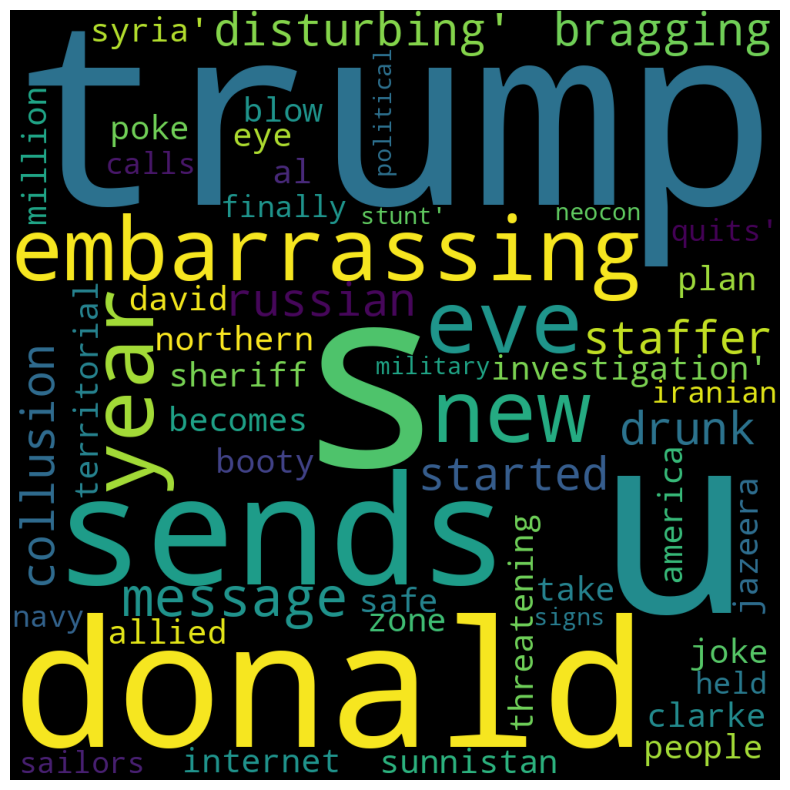

In [39]:
txt = str(df_fake['title'].values).lower()
make_wordcloud(txt)

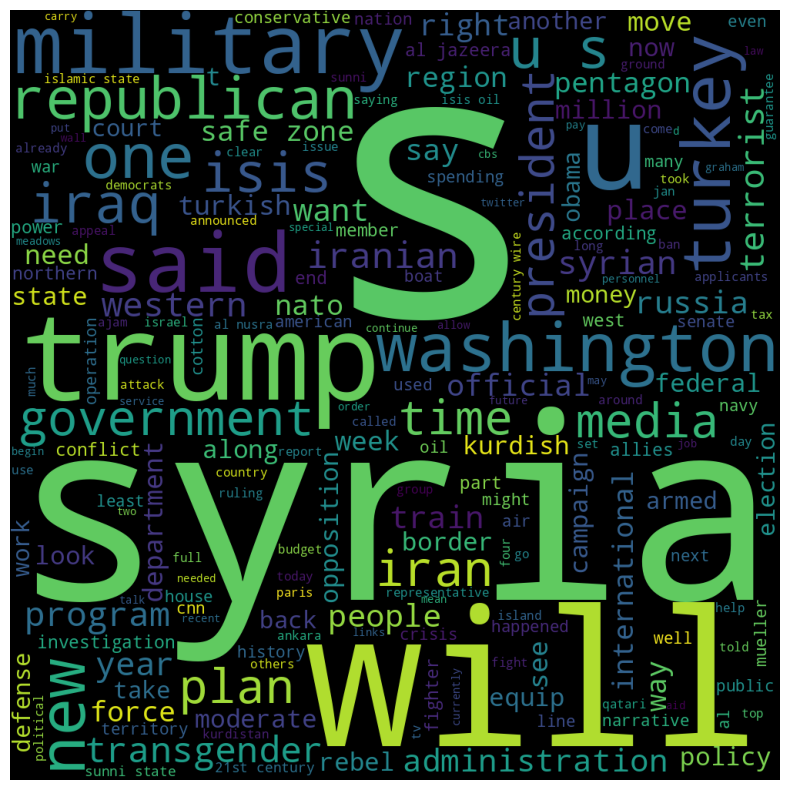

In [40]:
txt = str(df['text'].values).lower()
make_wordcloud(txt)

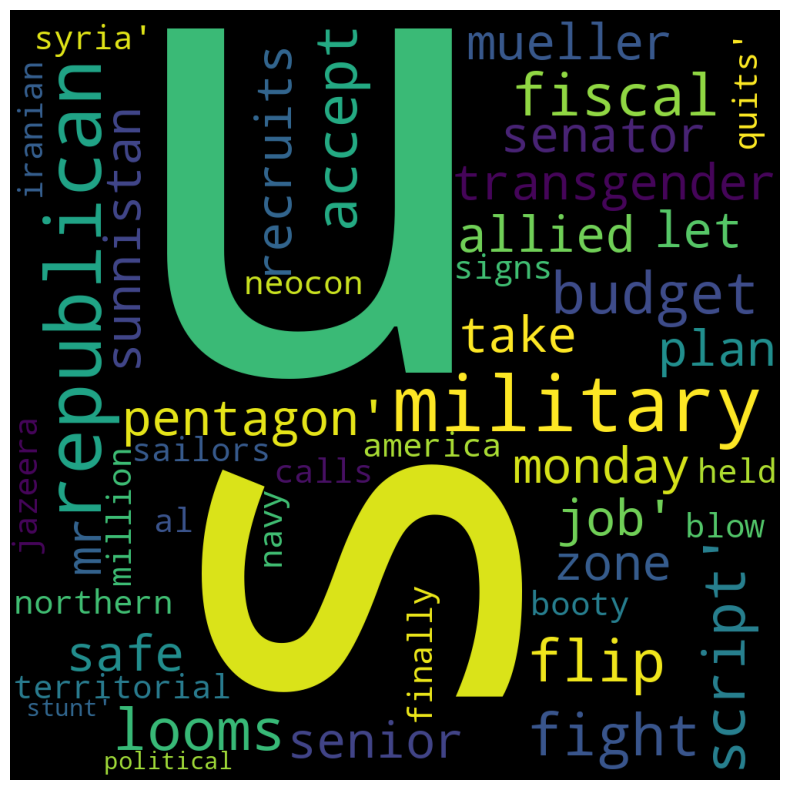

In [41]:
txt = str(df['title'].values).lower()
make_wordcloud(txt)

In [42]:
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


# Preprocessing

In [43]:
print("df_fake_news_net text column duplicates: \n")
df['text'].duplicated().sum()

df_fake_news_net text column duplicates: 



6252

In [44]:
df.drop_duplicates(subset='text', keep='last', inplace=True)

In [45]:
print("df_fake_news_net text column duplicates: \n")
df['text'].duplicated().sum()

df_fake_news_net text column duplicates: 



0

In [46]:
def preprocess_text(text, stemming=False):
    # Define stop words, stemmer and lemmatizer
    STOP_WORDS = set(stopwords.words('english'))
    STEMMER = PorterStemmer()
    LEMMATIZER = WordNetLemmatizer()

    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, digits, and punctuation marks
    text = re.sub(r'\W+|\d+', ' ', text)

    # Remove single letter words
    text = re.sub(r'\b[a-zA-Z]\b', ' ', text)

    # Tokenize the text
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in STOP_WORDS]
    
    # Lemmatize or stem words
    if stemming:
        words = [STEMMER.stem(word) for word in words]
    else:
        words = [LEMMATIZER.lemmatize(word) for word in words]
    
    # Reconstruct the text
    text = ' '.join(words)
    
    return text

In [47]:
test = df.copy()

In [56]:
df["text"].apply(preprocess_text, stemming=True)

0        washington reuter head conserv republican fact...
1        washington reuter transgend peopl allow first ...
2        washington reuter special counsel investig lin...
3        washington reuter trump campaign advis georg p...
4        seattl washington reuter presid donald trump c...
                               ...                        
23476    st centuri wire say wire report earlier week u...
23477    st centuri wire say familiar theme whenev disp...
23478    patrick henningsen st centuri wirerememb obama...
23479    st centuri wire say al jazeera america go hist...
23480    st centuri wire say wire predict new year look...
Name: text, Length: 38646, dtype: object

In [49]:
def load_word2vec_model():
  word2vec_model = api.load("word2vec-google-news-300")
  
  return word2vec_model

In [50]:
word2vec_model = load_word2vec_model()

[=================================================-] 99.8% 1659.9/1662.8MB downloaded


In [51]:
def word2vec(text):
    words = nltk.word_tokenize(text)
    words = [word for word in words if word in word2vec_model]

    if len(words) > 0:
        vec_sum = np.sum(word2vec_model[words], axis=0)
        return vec_sum / len(words)
    else:
        return np.zeros(word2vec_model.vector_size)

In [57]:
df['text_vec'] = df['text'].apply(word2vec)

In [58]:
def array_to_float(df, column_name):
    # Convert the array column into a new DataFrame
    array_column_df = pd.DataFrame(df[column_name].to_list())

    # Drop the original array column from the main DataFrame
    df = df.drop(column_name, axis=1)

    # Reset the indices of both dataframes
    array_column_df = array_column_df.reset_index(drop=True)
    df = df.reset_index(drop=True)

    # Concatenate the main DataFrame with the new DataFrame
    df = pd.concat([df, array_column_df], axis=1)

    return df

In [59]:
df = array_to_float(df, 'text_vec')

In [60]:
X = df.drop(['title', 'text', 'subject', 'date', 'label'], axis=1) #word2vec
y = df['label'] #word2vec

In [61]:
def split_dataset(X, y, train_size=0.7, val_size=0.15, test_size=0.15, random_state=42):
    # First, split the dataset into a train+val subset and a test subset
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    # Calculate the new ratio for validation size based on train+val subset
    new_val_size = val_size / (train_size + val_size)

    # Split the train+val subset into separate train and validation subsets
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=new_val_size, random_state=random_state, stratify=y_train_val)

    return X_train, X_val, X_test, y_train, y_val, y_test

In [62]:
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X, y)

# Modeling

In [63]:
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [64]:
class FakeNewsDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [65]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred.squeeze()

In [66]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


train_dataset = FakeNewsDataset(X_train_tensor, y_train_tensor)
val_dataset = FakeNewsDataset(X_val_tensor, y_val_tensor)
test_dataset = FakeNewsDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [67]:
input_size = X_train.shape[1]

In [68]:
model = LogisticRegression(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [69]:
n_epochs = 100

for epoch in range(n_epochs):
    for data, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}")

Epoch [1/100], Loss: 0.4087
Epoch [2/100], Loss: 0.2265
Epoch [3/100], Loss: 0.3599
Epoch [4/100], Loss: 0.1845
Epoch [5/100], Loss: 0.2118
Epoch [6/100], Loss: 0.1666
Epoch [7/100], Loss: 0.2622
Epoch [8/100], Loss: 0.1270
Epoch [9/100], Loss: 0.0797
Epoch [10/100], Loss: 0.0987
Epoch [11/100], Loss: 0.1755
Epoch [12/100], Loss: 0.0945
Epoch [13/100], Loss: 0.1281
Epoch [14/100], Loss: 0.1382
Epoch [15/100], Loss: 0.0641
Epoch [16/100], Loss: 0.0216
Epoch [17/100], Loss: 0.1181
Epoch [18/100], Loss: 0.1515
Epoch [19/100], Loss: 0.2027
Epoch [20/100], Loss: 0.0986
Epoch [21/100], Loss: 0.2838
Epoch [22/100], Loss: 0.2363
Epoch [23/100], Loss: 0.0920
Epoch [24/100], Loss: 0.1318
Epoch [25/100], Loss: 0.1923
Epoch [26/100], Loss: 0.1140
Epoch [27/100], Loss: 0.1543
Epoch [28/100], Loss: 0.2931
Epoch [29/100], Loss: 0.0908
Epoch [30/100], Loss: 0.0999
Epoch [31/100], Loss: 0.2896
Epoch [32/100], Loss: 0.0911
Epoch [33/100], Loss: 0.0234
Epoch [34/100], Loss: 0.0367
Epoch [35/100], Loss: 0

In [70]:
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, labels in data_loader:
            outputs = model(data)
            predicted = torch.round(outputs)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

In [71]:
val_accuracy = evaluate_model(model, val_loader)
test_accuracy = evaluate_model(model, test_loader)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Validation Accuracy: 0.9745
Test Accuracy: 0.9746


## With Optuna

In [72]:
def train_and_evaluate(X_train, y_train, X_val, y_val, trial, lr, weight_decay, batch_size):
    # Convert the training and validation data to PyTorch tensors and create DataLoaders
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

    train_dataset = FakeNewsDataset(X_train_tensor, y_train_tensor)
    val_dataset = FakeNewsDataset(X_val_tensor, y_val_tensor)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    # Initialize the logistic regression model, loss, and optimizer
    input_size = X_train.shape[1]
    model = LogisticRegression(input_size)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Train the logistic regression model
    num_epochs = 30
    for epoch in range(num_epochs):
        model.train()
        for data, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate the model on the validation dataset
    val_accuracy = evaluate_model(model, val_loader)

    return val_accuracy

In [73]:
def objective(trial):
    lr = trial.suggest_float("lr", 1e-3, 1e-1, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])

    val_accuracy = train_and_evaluate(X_train, y_train, X_val, y_val, trial, lr, weight_decay, batch_size)
    return val_accuracy

In [74]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, show_progress_bar=True)

[I 2023-05-23 10:50:49,181] A new study created in memory with name: no-name-b21c3fa1-41a2-4a67-95c7-56957c0d5b83
/usr/local/lib/python3.10/dist-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2023-05-23 10:51:52,018] Trial 0 finished with value: 0.9725720200103501 and parameters: {'lr': 0.004739010311728708, 'weight_decay': 1.2601073533007628e-05, 'batch_size': 16}. Best is trial 0 with value: 0.9725720200103501.
[I 2023-05-23 10:52:22,548] Trial 1 finished with value: 0.9161635328618251 and parameters: {'lr': 0.05161629643461513, 'weight_decay': 0.0013140083673870361, 'batch_size': 64}. Best is trial 0 with value: 0.9725720200103501.
[I 2023-05-23 10:53:00,675] Trial 2 finished with value: 0.952561669829222 and parameters: {'lr': 0.004700187887525834, 'weight_decay': 8.393953801307136e-05, 'batch_size': 32}. Best is trial 0 with value: 0.9725720200103501.
[I 2023-05-23 10:53:27,830] Trial 3 finished with value: 0.9510091426599966 and parameters: {'lr': 0.003177449330433769, 'weight_decay': 0.00010082672490752153, 'batch_size': 64}. Best is trial 0 with value: 0.9725720200103501.
[I 2023-05-23 10:54:31,357] Trial 4 finished with value: 0.9654993962394341 and parameters: 

In [75]:
best_params = study.best_params
best_val_accuracy = study.best_value

print(f"Best hyperparameters: {best_params}")
print(f"Best validation accuracy: {best_val_accuracy:.4f}")

Best hyperparameters: {'lr': 0.06140288533331151, 'weight_decay': 1.0114945379463271e-05, 'batch_size': 128}
Best validation accuracy: 0.9738


In [76]:
def train_and_test_evaluate(X_train, y_train, X_test, y_test, best_params):
    # Convert the training and validation data to PyTorch tensors and create DataLoaders
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

    lr = best_params['lr']
    weight_decay = best_params['weight_decay']
    batch_size = best_params['batch_size']

    train_dataset = FakeNewsDataset(X_train_tensor, y_train_tensor)
    test_dataset = FakeNewsDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    # Initialize the logistic regression model, loss, and optimizer
    input_size = X_train.shape[1]
    model = LogisticRegression(input_size)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Train the logistic regression model
    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        for data, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate the model on the validation dataset
    test_accuracy = evaluate_model(model, test_loader)

    return test_accuracy

In [77]:
test_accuracy = train_and_test_evaluate(X_train, y_train, X_test, y_test, best_params)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9724


## Evaluate model using k-stratified fold Cross Validation:


In [78]:
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds)

accuracies = []

# Use the best hyperparameters found by Optuna
best_params = study.best_params

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate the model on the current fold using the best hyperparameters
    accuracy = train_and_test_evaluate(X_train, y_train, X_test, y_test, best_params)
    accuracies.append(accuracy)

# Calculate and print the average accuracy
average_accuracy = sum(accuracies) / len(accuracies)
print("Average accuracy using k-stratified fold cross-validation:", average_accuracy)

Average accuracy using k-stratified fold cross-validation: 0.9669305284427177


## Artificial Neural Network

In [79]:
print(X_train.shape[1])

300


In [80]:
print(len(np.unique(y_train)))

2


In [81]:
class SimpleANN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [82]:
# Set the input_size, hidden_size, and num_classes according to your dataset
input_size = 300  # The length of your feature vector
hidden_size = 128  # Number of neurons in the hidden layer
num_classes = 2  # Number of classes in your dataset

# Create the model, loss function, and optimizer
model = SimpleANN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Convert your training data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/1000], Loss: 0.6920
Epoch [2/1000], Loss: 0.6871
Epoch [3/1000], Loss: 0.6825
Epoch [4/1000], Loss: 0.6780
Epoch [5/1000], Loss: 0.6734
Epoch [6/1000], Loss: 0.6687
Epoch [7/1000], Loss: 0.6638
Epoch [8/1000], Loss: 0.6587
Epoch [9/1000], Loss: 0.6533
Epoch [10/1000], Loss: 0.6474
Epoch [11/1000], Loss: 0.6411
Epoch [12/1000], Loss: 0.6345
Epoch [13/1000], Loss: 0.6277
Epoch [14/1000], Loss: 0.6208
Epoch [15/1000], Loss: 0.6136
Epoch [16/1000], Loss: 0.6062
Epoch [17/1000], Loss: 0.5986
Epoch [18/1000], Loss: 0.5907
Epoch [19/1000], Loss: 0.5826
Epoch [20/1000], Loss: 0.5743
Epoch [21/1000], Loss: 0.5657
Epoch [22/1000], Loss: 0.5570
Epoch [23/1000], Loss: 0.5480
Epoch [24/1000], Loss: 0.5389
Epoch [25/1000], Loss: 0.5296
Epoch [26/1000], Loss: 0.5203
Epoch [27/1000], Loss: 0.5108
Epoch [28/1000], Loss: 0.5014
Epoch [29/1000], Loss: 0.4919
Epoch [30/1000], Loss: 0.4824
Epoch [31/1000], Loss: 0.4729
Epoch [32/1000], Loss: 0.4634
Epoch [33/1000], Loss: 0.4540
Epoch [34/1000], Lo

In [83]:
# Evaluate the model on the test set
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
outputs = model(X_val_tensor)
_, predicted = torch.max(outputs.data, 1)
correct = (predicted == y_val_tensor).sum().item()
accuracy = correct / len(y_val)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.9860


In [84]:
# Evaluate the model on the test set
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)
outputs = model(X_test_tensor)
_, predicted = torch.max(outputs.data, 1)
correct = (predicted == y_test_tensor).sum().item()
accuracy = correct / len(y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9783


In [85]:
def print_classification_report(y_test, y_pred, model_name):
    print(f"{model_name.capitalize()} Classification Report")
    print("*"*30)
    print(classification_report(y_test, y_pred))
    print("*"*30)
    
def print_confusion_matrix(y_test, y_pred, model_name):
    print(f"{model_name.capitalize()} Confusion Matrix")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

In [86]:
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm1d(hidden_size1) # Batch normalization
        self.dropout1 = nn.Dropout(0.5) # Dropout layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm1d(hidden_size2) # Batch normalization
        self.dropout2 = nn.Dropout(0.5) # Dropout layer
        self.fc3 = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.bn1(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.bn2(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        return out

Epoch [1/100], Loss: 0.8433
Epoch [2/100], Loss: 0.6317
Epoch [3/100], Loss: 0.5051
Epoch [4/100], Loss: 0.4242
Epoch [5/100], Loss: 0.3648
Epoch [6/100], Loss: 0.3249
Epoch [7/100], Loss: 0.2940
Epoch [8/100], Loss: 0.2691
Epoch [9/100], Loss: 0.2489
Epoch [10/100], Loss: 0.2357
Epoch [11/100], Loss: 0.2241
Epoch [12/100], Loss: 0.2138
Epoch [13/100], Loss: 0.2034
Epoch [14/100], Loss: 0.1979
Epoch [15/100], Loss: 0.1880
Epoch [16/100], Loss: 0.1822
Epoch [17/100], Loss: 0.1763
Epoch [18/100], Loss: 0.1711
Epoch [19/100], Loss: 0.1648
Epoch [20/100], Loss: 0.1604
Epoch [21/100], Loss: 0.1551
Epoch [22/100], Loss: 0.1498
Epoch [23/100], Loss: 0.1471
Epoch [24/100], Loss: 0.1421
Epoch [25/100], Loss: 0.1394
Epoch [26/100], Loss: 0.1369
Epoch [27/100], Loss: 0.1301
Epoch [28/100], Loss: 0.1282
Epoch [29/100], Loss: 0.1248
Epoch [30/100], Loss: 0.1213
Epoch [31/100], Loss: 0.1187
Epoch [32/100], Loss: 0.1162
Epoch [33/100], Loss: 0.1145
Epoch [34/100], Loss: 0.1093
Epoch [35/100], Loss: 0

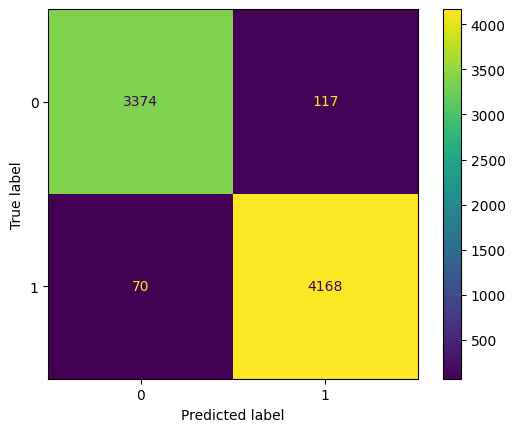

In [87]:
# Adjust the input size, hidden size, and output size based on your dataset and feature extraction method
input_size = 300
hidden_size1 = 64
hidden_size2 = 128
num_classes = 2

model = ANN(input_size, hidden_size1, hidden_size2, num_classes)

# Choose an optimization algorithm and set the learning rate
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()

# Set the number of epochs for training
num_epochs = 100

# Train the model
for epoch in range(num_epochs):
    # Convert the input and target variables to PyTorch tensors
    inputs = torch.tensor(X_train.values, dtype=torch.float32)
    targets = torch.tensor(y_train.values, dtype=torch.long)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
with torch.no_grad():
    test_inputs = torch.tensor(X_test.values, dtype=torch.float32)
    test_outputs = model(test_inputs)
    _, y_pred = torch.max(test_outputs.data, 1)

test_accuracy = (y_pred.numpy() == y_test.values).mean()

# Print the classification report and confusion matrix
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print_classification_report(y_test, y_pred, "ANN")
print_confusion_matrix(y_test, y_pred, "ANN")
